In [33]:
# importing the module
import pandas as pd

# importing the dataset
data = pd.read_csv("BTC-USD.csv")

# dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-05,49937.859375,51868.679688,49538.597656,51753.410156,51753.410156,30322676319
1,2021-09-06,51769.003906,52700.941406,51053.679688,52633.535156,52633.535156,38884105426
2,2021-09-07,52660.480469,52853.765625,43285.207031,46811.128906,46811.128906,65210059683
3,2021-09-08,46827.761719,47334.054688,44561.394531,46091.390625,46091.390625,49007762488
4,2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,38672657013


In [34]:
# removing few columns
data.drop("Open", inplace = True, axis = 1)
data.drop("High", inplace = True, axis = 1)
data.drop("Low", inplace = True, axis = 1)
data.drop("Adj Close", inplace = True, axis = 1)
data.drop("Volume", inplace = True, axis = 1)

In [44]:
# finding the rolling mean and std
mean = data.rolling(window=12).mean() 
std = data.rolling(window=12).std()

/tmp/ipykernel_172459/2967272586.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  mean = data.rolling(window=12).mean()
/tmp/ipykernel_172459/2967272586.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  std = data.rolling(window=12).std()


In [36]:
print(std)

          Close
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
..          ...
361  777.288479
362  743.655103
363  709.571714
364  615.388270
365  515.259277

[366 rows x 1 columns]


In [31]:
# importig module

import matplotlib.pyplot as plt
#Plot rolling statistics

data['Date'] = pd.to_datetime(data['Date']) 
df = data.set_index(['Date'])

df.head()

,Close
Date,
2021-09-05,1970-01-01 00:00:00.000051753
2021-09-06,1970-01-01 00:00:00.000052633
2021-09-07,1970-01-01 00:00:00.000046811
2021-09-08,1970-01-01 00:00:00.000046091
2021-09-09,1970-01-01 00:00:00.000046391


In [37]:
#Determine rolling statistics
rolmean = data.rolling(window=12).mean() 
rolstd = data.rolling(window=12).std()

/tmp/ipykernel_172459/3567362788.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolmean = data.rolling(window=12).mean()
/tmp/ipykernel_172459/3567362788.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolstd = data.rolling(window=12).std()


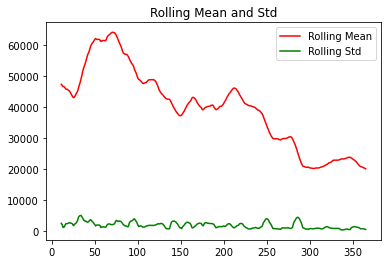

In [46]:
# importing the required modules
import matplotlib.pyplot as plt

#Plot rolling statistics
mean = plt.plot(mean, color='red', label='Rolling Mean')
std = plt.plot(std, color='green', label='Rolling Std')

# labeling the axis
plt.legend(loc='best')
plt.title('Rolling Mean and Std')
plt.show()

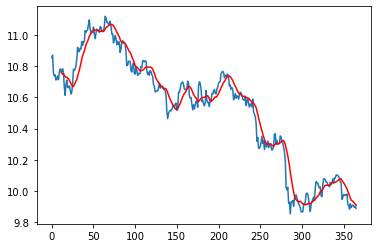

In [53]:
# importing the module
import numpy as np

#Applying the log transformation on Closing price
logScale = np.log(data['Close'])

#TFinding the average and std
moving_Average = logScale.rolling(window=12).mean()
moving_STD = logScale.rolling(window=12).std()

# plotting the graph
plt.plot(logScale)
plt.plot(movingAverage, color='red')
plt.show()

In [55]:
# transforming the time series
log_transformed = logScale - movingAverage

#Remove NAN values
log_transformed.dropna(inplace=True)

# printing heading of dataset
log_transformed.head()

11    0.010975
12    0.007676
13    0.036034
14    0.013924
15   -0.078095
Name: Close, dtype: float64

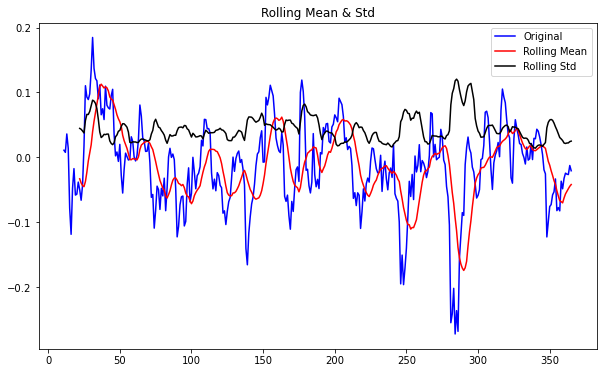

In [58]:
# fixing the size of image
plt.figure(figsize=[10, 6])

# finding the rolling mean and std
movingAverage = log_transformed.rolling(window=12).mean()
movingSTD = log_transformed.rolling(window=12).std()
    
# plotting graph and meaa and std
orig = plt.plot(log_transformed, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

# plotting stationary time series data
plt.legend(loc='best')
plt.title('Rolling Mean & Std')
plt.show()